In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('Churn.csv')

# Display top of dataframe
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Initial Clean Up

In [60]:
#to check please uncomment
#data.dtypes

Drop Phone number Column

In [61]:
#I drop the phone number, area code and state columns

data =  data.drop(['Phone', 'Area Code', 'State'], axis=1)

In [62]:
# NULL value check in data frame before we start 
data.isnull().values.any()

False

Before going further, I eliminate spaces from the column names

In [63]:

#Create a Rename_Dictionary_to_replace



def create_replace_space_dict(in_panda):
    space = ' '
    out_dict = {}

    for col in in_panda.columns:
        correct_string = col.replace(' ', '_')
        out_dict[col] = correct_string.replace('\'', '')

    return(out_dict)



In [64]:
#double check dictionnary => unccomment

In [65]:
#create_rename_dict(data)

rename_dict = create_replace_space_dict(data)

data.rename(columns=rename_dict, inplace=True)
data.head()

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Change the Categorical Variables Intl_Plan and VMail_Plan to 1 and 0

In [66]:
data_cat = data
data_cat.Intl_Plan = data_cat.Intl_Plan.replace({'yes': 1.0, 'no': 0.0})
data_cat.VMail_Plan = data_cat.VMail_Plan.replace({'yes': 1.0, 'no': 0.0})
data_cat.head()

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Assesment of Distribution of Churn Values

In [67]:

def check_balance(dframe, label):
    label_count_abs = data[label].value_counts()
    label_count_percent = data[label].value_counts(normalize=True) * 100
    print(label_count_percent,'\n')
    print(label_count_abs)
    ax = label_count_abs.plot.bar(rot=0)
    return()
    

0    85.508551
1    14.491449
Name: Churn, dtype: float64 

0    2850
1     483
Name: Churn, dtype: int64


()

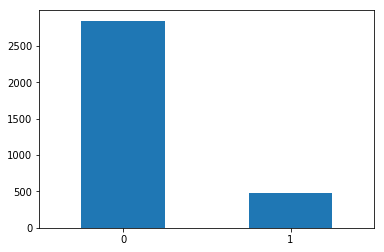

In [68]:
check_balance(data_cat,label='Churn')

# Initial Logistic Fit with statsmodel

statsmodel with formula takes the y and X in form y_column ~ + x1 + x2 + x3 .... I decide to make this more programmatic and crete variable for it.


In [69]:
data_vars = data_cat.columns.values.tolist()
y =['Churn']
X =[i for i in data_vars if i not in y]


In [70]:
#Uncomment to Double-Check

#data_vars
#y
#X

In [71]:
#function to create a string as variable for statsmodel, based on y and X lists

def create_string(y_in, X_in):
    u = 0
    string =  y_in[0] + '~'

    for i in X_in:
        if (u == 0):
            string += ' '
            string += i
            u += 1
        else:
            string += ' + '
            string += i
            
    return(string)

After running with all variables initially (State and others encoded one-hot) I did not find much relevance in those (see other notebooks) and just run a single model on y and X derived from data_cat

In [72]:
stats_string = create_string(y,X)

In [73]:
stats_string

'Churn~ Account_Length + Intl_Plan + VMail_Plan + VMail_Message + Day_Mins + Day_Calls + Day_Charge + Eve_Mins + Eve_Calls + Eve_Charge + Night_Mins + Night_Calls + Night_Charge + Intl_Mins + Intl_Calls + Intl_Charge + CustServ_Calls'

Run a logistic regression with statsmodel



In [74]:

import statsmodels.formula.api as sm 


In [75]:
model= sm.logit(formula=stats_string, data= data_cat).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.323841
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3315
Method:                           MLE   Df Model:                           17
Date:                Sun, 31 May 2020   Pseudo R-squ.:                  0.2174
Time:                        10:59:42   Log-Likelihood:                -1079.4
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                1.758e-116
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.6516      0.724    -11.944      0.000     -10.071      -7.232
Account_Length     0.0008      0.001      0.608      0.543      -0.002       0.004
Intl_Plan          2.0428      0.145     14.040      0.000       1.758       2.328
VMail_Plan        -2.0250      0.574     -3.527      0.000      -3.150      -0.900
VMail_Message      0.0359      0.018      1.992      0.046       0.001       0.071
Day_Mins          -0.2442      3.274     -0.075      0.941      -6.662       6.173
Day_Calls          0.0032      0.003      1.158      0.247      -0.002       0.009
Day_Charge         1.5127     19.260      0.079      0.937     -36.237      39.262
Eve_Mins           0.8187      1.636      0.501      0.617      -2.387       4.025
Eve_Calls          0.0011      0.003      0.380      0.704      -0.004       0.007
Eve_Charge        -9.5464     19.244     -0.496      0.620     -47.263      28.171
Night_Mins        -0.1238      0.876     -0.141      0.888      -1.842       1.594
Night_Calls        0.0007      0.003      0.246      0.806      -0.005       0.006
Night_Charge       2.8338     19.477      0.145      0.884     -35.340      41.008
Intl_Mins         -4.3378      5.301     -0.818      0.413     -14.728       6.052
Intl_Calls        -0.0930      0.025     -3.710      0.000      -0.142      -0.044
Intl_Charge       16.3900     19.632      0.835      0.404     -22.089      54.869
CustServ_Calls     0.5136      0.039     13.079      0.000       0.437       0.591
==================================================================================
"""

In [76]:
def accuracy_scores(conf_array):
    True_N = conf_array[0,0]
    False_N = conf_array[0,1]
    True_P = conf_array[1,1]
    False_P = conf_array[1,0]
    Real_P = np.sum(conf_array[:,1])
    Real_N = np.sum(conf_array[:,0])
    total = np.sum(conf_array)
    miss_rate = 100*((False_N +False_P)/total)
    accuracy = 100*((True_N + True_P)/total)
    recall = 100 * True_P / Real_P
    precision = 100 * True_N / Real_N
    print('Missclassification Rate is', miss_rate)
    print('Accuracy is', accuracy)
    print('Sensitivity (T_p/Act_p) is', recall)
    print('Specifity (T_n/Act_n) is', precision)
    return(miss_rate, accuracy)

In [77]:
confusion = model.pred_table()
columns_confusion = ['0_Predicted', '1_Predicted']
conf_df = pd.DataFrame(confusion, columns=columns_confusion)
conf_df

,0_Predicted,1_Predicted
0,2769.0,81.0
1,379.0,104.0


In [78]:
accuracy_scores(confusion)

Missclassification Rate is 13.801380138013803
Accuracy is 86.1986198619862
Sensitivity (T_p/Act_p) is 56.21621621621622
Specifity (T_n/Act_n) is 87.96060991105463


(13.801380138013803, 86.1986198619862)

# Initial Outcome here 

statsmodel by default takes care of the one-hot encoded values. I will use the data_cat_2 to mimic te same in sklearn log regression

# Initial match witk sklearn

In [79]:
relevant = data_cat.columns.tolist()
#relevant

In [80]:
def create_relevant_Features(in_list, eliminate_list):
    new_list = []
    for i in in_list:
        if i in eliminate_list:
            continue
        else:
            new_list.append(i)
    return(new_list)

In [81]:
predictor = 'Churn'
to_eliminate = []
to_eliminate.append(predictor)

In [82]:
relevant_X = create_relevant_Features(relevant, to_eliminate)
X_Train = data_cat[relevant_X]
y_train = data_cat[predictor]

In [83]:
#Uncomment to double-check

#X_Train
#y_train

Now with the sklearn

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [85]:
logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
logreg.fit(X_Train, y_train.values.ravel())

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 7.92177344e-04  2.04536640e+00 -1.96012424e+00  3.38961255e-02
   1.29127988e-02  3.06816936e-03  1.41466203e-04  9.09805352e-03
   9.14427222e-04 -2.25882139e-02  3.26536254e-03  5.11158000e-04
   8.41377972e-03  7.21934976e-02 -9.22011962e-02  5.29481989e-02
   5.13377255e-01]]
[-8.55365921]


# Confusion Matrix and ROC

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [88]:
y_hat = logreg.predict(X_Train)
confusion_table = confusion_matrix(y_train, y_hat)
print(confusion_table)

[[2771   79]
 [ 380  103]]


In [89]:
accuracy_scores(confusion_table)

Missclassification Rate is 13.771377137713772
Accuracy is 86.22862286228623
Sensitivity (T_p/Act_p) is 56.59340659340659
Specifity (T_n/Act_n) is 87.94033640114249


(13.771377137713772, 86.22862286228623)

In [90]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2850
           1       0.57      0.21      0.31       483

    accuracy                           0.86      3333
   macro avg       0.72      0.59      0.62      3333
weighted avg       0.83      0.86      0.83      3333



Area under the Curve 0.8231331953071084


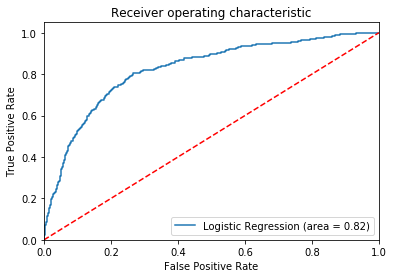

In [91]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_Train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_Train)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion of this first ROC

Not really useful, to calculate the ROC on the same data as we trained the model. Will need to split test/train data to become more meaningful

# Split Train / Test Data

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
relevant_X = create_relevant_Features(relevant, to_eliminate)
X = data_cat[relevant_X]
y = data_cat[predictor]

X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [94]:
#Uncomment to double-check

#X_Test
#y_test

In [95]:
logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
logreg.fit(X_Train, y_train.values.ravel())

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
y_hat = logreg.predict(X_Train)
confusion_table = confusion_matrix(y_train, y_hat)
print(confusion_table)

[[1939   54]
 [ 258   82]]


In [97]:
y_hat = logreg.predict(X_Test)
confusion_table = confusion_matrix(y_test, y_hat)
print(confusion_table)

[[840  17]
 [118  25]]


In [98]:
y_hat = logreg.predict(X_Test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.17      0.27       143

    accuracy                           0.86      1000
   macro avg       0.74      0.58      0.60      1000
weighted avg       0.84      0.86      0.83      1000



Area under the Curve 0.8006625812926863


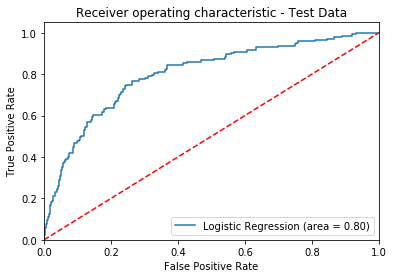

In [99]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_Test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_Test)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Makes sense that we dropped ROC score a bit.

# Feature Selection

We had the statsmodel with the p-values, we will use this to further tune feature selection

In [100]:
model.pvalues

Intercept         6.937464e-33
Account_Length    5.431994e-01
Intl_Plan         8.896175e-45
VMail_Plan        4.196884e-04
VMail_Message     4.635470e-02
Day_Mins          9.405470e-01
Day_Calls         2.470484e-01
Day_Charge        9.373980e-01
Eve_Mins          6.167171e-01
Eve_Calls         7.038171e-01
Eve_Charge        6.198402e-01
Night_Mins        8.876505e-01
Night_Calls       8.056284e-01
Night_Charge      8.843194e-01
Intl_Mins         4.131853e-01
Intl_Calls        2.074395e-04
Intl_Charge       4.038043e-01
CustServ_Calls    4.369562e-39
dtype: float64

In [101]:
#Feature Reduction according to a threshold P-selector to select only values smaller or equal than p-selector

def feature_reduction(in_model, P_selector):
    
    newlist = list(in_model[in_model['P>|z|']<=P_selector].index)[1:] 
    return(newlist)
    

In [102]:
def prepare_X_y_red(selector_list, X_Train_in, X_Test_in):
    
    X_Train_new = X_Train_in[selector_list]
    X_Test_new = X_Test_in[selector_list]

    return(X_Train_new, X_Test_new)

In [103]:
def f1_score(confusion_in):
    True_N = confusion_in[0,0]
    False_N = confusion_in[0,1]
    True_P = confusion_in[1,1]
    False_P = confusion_in[1,0]

    prec_ision = True_P / (True_P + False_P)
    re_call = True_P / (True_P + False_N)
    f1 = (2* prec_ision * re_call / (prec_ision + re_call))
    
    return(f1)

# Apply it now to select features

# Statsmodel on train set only

We tuned the statsmodel on the full data, but it should be the same Train/Test Split .. so we correct this

In [104]:
X_Train_statMod = X_Train
X_Train_statMod['Churn'] = y_train

#We start with the last model (which was done on train/test split)
model.pvalues
model_red = model
#LRresult = (model.summary2().tables[1])

#stats_mod_Train = X_Train
my_threshold = 1
threshold_countdown = 0.01
best_f1 = 0

while (my_threshold > 0.05):
    #print('p-Threshold: ', my_threshold)
    LRresult = (model_red.summary2().tables[1])
    new_relevant = feature_reduction(LRresult, my_threshold)
    stats_string_red = create_string([predictor], new_relevant)
    model_red = sm.logit(formula=stats_string_red, data= X_Train_statMod).fit()
    X_Train5, X_Test5,= prepare_X_y_red(new_relevant, X_Train, X_Test)
    #print('do sklearn')
    logreg = LogisticRegression(C=1e8, max_iter=10000, solver='lbfgs')
    logreg.fit(X_Train5, y_train.values.ravel())
    y_hat = logreg.predict(X_Test5)
    confusion_table = confusion_matrix(y_test, y_hat)
    f1 = f1_score(confusion_table)
    print(f1)
    best_f1 = max(f1, best_f1)
    if (f1 == best_f1):
        best_relevant = new_relevant
        best_threshold = my_threshold
    #print('f1 = ', f1)
    my_threshold = my_threshold - threshold_countdown
    
    
    
print('best f1: ', best_f1)
print('best Threshold: ', best_threshold)
print('best relevant: ', best_relevant)

    
LRresult = (model.summary2().tables[1])
all_features = feature_reduction(LRresult, 1)
len(all_features)
len(best_relevant)


    
    

/Users/tkramer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 8
0.2702702702702703
Optimization terminated successf

0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Optimization terminated successfully.
         Current function value: 0.349896
         Iterations 7
0.25274725274725274
Opti

15

In [105]:
#print Features, we removed


removed_features = []
for i in all_features:
    if i in best_relevant:
        continue
    else:
        removed_features.append(i) 
        
print('improved by elimination of: ', removed_features) 

improved by elimination of:  ['Eve_Calls', 'Night_Calls']


In [106]:
#This was just to review the model with all features, but not needed at this point

"""
model.pvalues
model_red = model

stats_mod_Train = X_Train
my_threshold = 1
threshold_countdown = 0.02
best_f1 = 0


LRresult = (model_red.summary2().tables[1])
new_relevant = feature_reduction(LRresult, my_threshold)
stats_string_red = create_string([predictor], new_relevant)
model_red = sm.logit(formula=stats_string_red, data= X_Train_statMod).fit()

model_red.summary2()
"""

'\nmodel.pvalues\nmodel_red = model\n\nstats_mod_Train = X_Train\nmy_threshold = 1\nthreshold_countdown = 0.02\nbest_f1 = 0\n\n\nLRresult = (model_red.summary2().tables[1])\nnew_relevant = feature_reduction(LRresult, my_threshold)\nstats_string_red = create_string([predictor], new_relevant)\nmodel_red = sm.logit(formula=stats_string_red, data= X_Train_statMod).fit()\n\nmodel_red.summary2()\n'

In [107]:
X_Train5, X_Test5,= prepare_X_y_red(best_relevant, X_Train, X_Test)

In [108]:
logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
logreg.fit(X_Train5, y_train.values.ravel())
y_hat = logreg.predict(X_Test5)
confusion_table = confusion_matrix(y_test, y_hat)
print(confusion_table)

[[839  18]
 [117  26]]


In [109]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.59      0.18      0.28       143

    accuracy                           0.86      1000
   macro avg       0.73      0.58      0.60      1000
weighted avg       0.84      0.86      0.83      1000



Area under the Curve 0.801225612194107


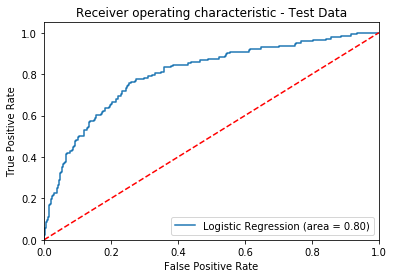

In [110]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_Test5))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_Test5)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion 

We reduced quite a lo of features in the excercise, when splitting test/train set. Results are not always reproducable as split seems to work a bit random. And hence results vary in a way.

In [111]:
len(best_relevant)

15

In [112]:
best_relevant

['Account_Length',
 'Intl_Plan',
 'VMail_Plan',
 'VMail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Charge',
 'Night_Mins',
 'Night_Charge',
 'Intl_Mins',
 'Intl_Calls',
 'Intl_Charge',
 'CustServ_Calls']

# Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [126]:
predictor = 'Churn'
to_eliminate = []
to_eliminate.append(predictor)


relevant_X = create_relevant_Features(relevant, to_eliminate)
X = data_cat[relevant_X]
y = data_cat[predictor]

X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [128]:
# Create Decision Tree classifer object


clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_Train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_Test)

In [129]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.936


In [130]:
confusion_table = confusion_matrix(y_test,y_pred)
print(confusion_table)

[[830  17]
 [ 47 106]]


In [131]:
accuracy_scores(confusion_table)

Missclassification Rate is 6.4
Accuracy is 93.60000000000001
Sensitivity (T_p/Act_p) is 86.17886178861788
Specifity (T_n/Act_n) is 94.64082098061573


(6.4, 93.60000000000001)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       847
           1       0.86      0.69      0.77       153

    accuracy                           0.94      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.93      0.94      0.93      1000



In [133]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

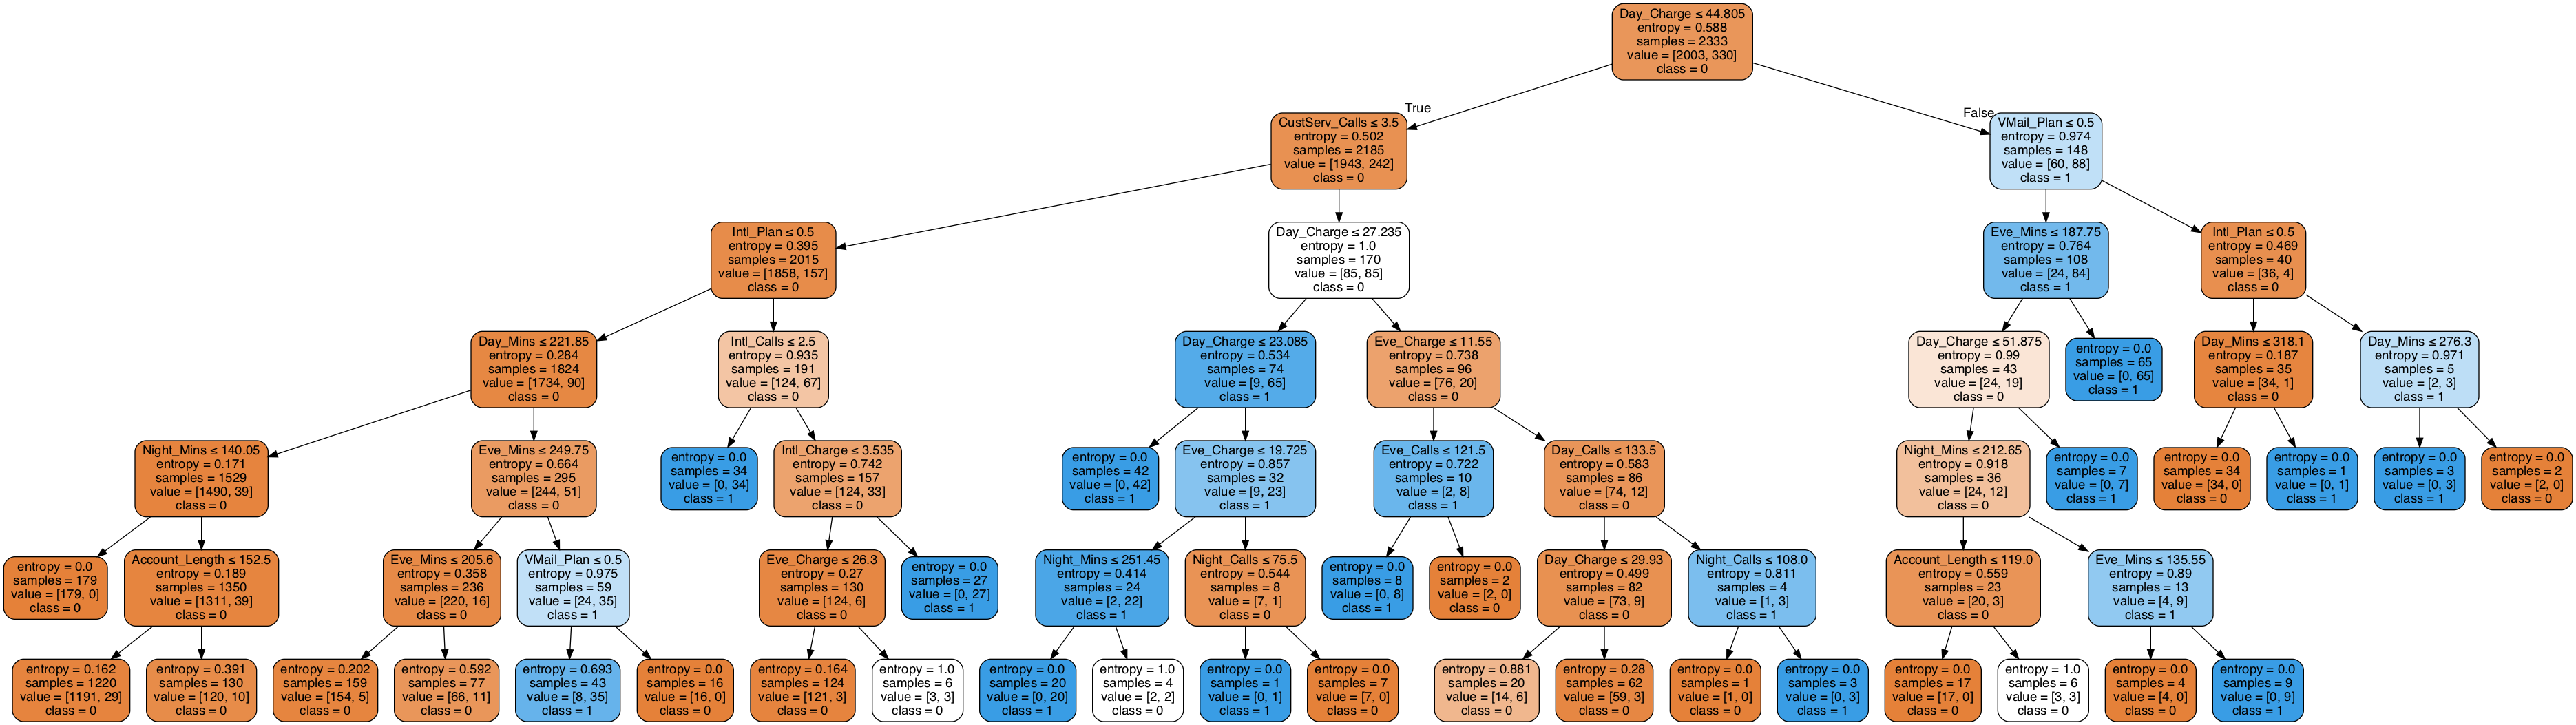

In [134]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = relevant_X ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churn.png')
Image(graph.create_png())

# K-means

In [135]:
data_cat.head()

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [136]:
#Let's create  numpy array(raw matrix) from this data

raw_mat = data_cat.to_numpy()

In [137]:
#to review, uncomment
#raw_mat

array([[128.  ,   0.  ,   1.  , ...,   2.7 ,   1.  ,   0.  ],
       [107.  ,   0.  ,   1.  , ...,   3.7 ,   1.  ,   0.  ],
       [137.  ,   0.  ,   0.  , ...,   3.29,   0.  ,   0.  ],
       ...,
       [ 28.  ,   0.  ,   0.  , ...,   3.81,   2.  ,   0.  ],
       [184.  ,   1.  ,   0.  , ...,   1.35,   2.  ,   0.  ],
       [ 74.  ,   0.  ,   1.  , ...,   3.7 ,   0.  ,   0.  ]])

Let's preprocess the data. For k-means, it seems odd to meassure distances where variables like minutes are in hundreds and others 0 or 1. I nrmalize them all to a 0 to 1.

In [139]:
from sklearn import preprocessing

In [161]:

min_max_scaler = preprocessing.MinMaxScaler()
raw_mat_scaled= min_max_scaler.fit_transform(raw_mat)

In [225]:
#to review, uncomment
#raw_mat_scaled

Let's review which number of clusters is good, using elbow method

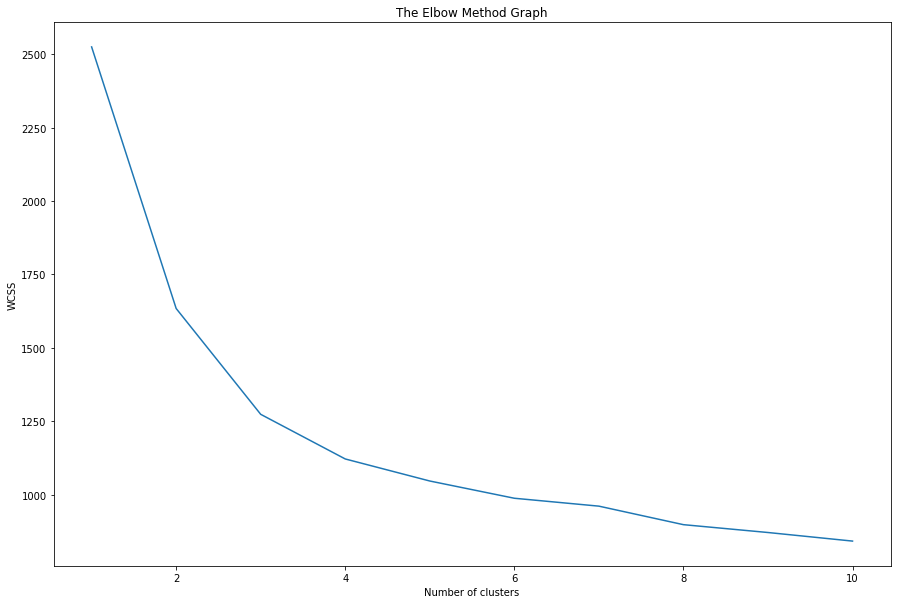

In [230]:
#3 Using the elbow method to find out the optimal number of #clusters. 


#Between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.

#wcss is withing vluster sum of squares (meassure of goodness of our clustering)

wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
        
    #kmeans algorithm fits to the X datase
    kmeans.fit(raw_mat_scaled)

    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    wcss.append(kmeans.inertia_)

#4.Plot the elbow graph

plt.figure(figsize=(15,10))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The strongest change in slope is between 3 and 5. Probably 4 clusters wuld be OK. But let's do 5.

In [231]:
Kmean_scaled = KMeans(n_clusters=5)
Kmean_scaled.fit(raw_mat_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [233]:
Kmean_scaled.inertia_

1057.4966790005637

In [167]:
Kmean_scaled.labels_

array([2, 2, 4, ..., 4, 3, 2], dtype=int32)

In [168]:
len(Kmean_scaled.labels_)

3333

let's add the cluster labels as column to the original data_frame (not scaled)

In [234]:
data_k_result = data_cat
data_k_result['Cluster'] = Kmean_scaled.labels_

In [235]:
cluster_0 = data_k_result[data_k_result['Cluster'] == 0]
cluster_1 = data_k_result[data_k_result['Cluster'] == 1]
cluster_2 = data_k_result[data_k_result['Cluster'] == 2]
cluster_3 = data_k_result[data_k_result['Cluster'] == 3]
cluster_4 = data_k_result[data_k_result['Cluster'] == 4]

In [236]:
cluster_0.describe()

,Account_Length,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Cluster
count,136.000000,136.000000,136.0,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.0
mean,104.367647,0.676471,1.0,30.397059,180.030882,102.705882,30.606176,202.604412,99.977941,17.221765,199.577941,101.632353,8.980809,10.698529,4.669118,2.889191,2.058824,0.588235,0.0
std,35.645956,0.469552,0.0,7.469721,50.901300,20.029651,8.653564,48.929064,19.330447,4.159189,52.743023,18.321737,2.373611,2.776462,2.661259,0.749216,1.820723,0.493972,0.0
min,17.000000,0.000000,1.0,12.000000,82.300000,54.000000,13.990000,75.300000,56.000000,6.400000,82.300000,49.000000,3.700000,3.700000,1.000000,1.000000,0.000000,0.000000,0.0
25%,77.000000,0.000000,1.0,26.000000,143.375000,89.000000,24.377500,166.975000,88.750000,14.197500,165.200000,88.750000,7.432500,8.975000,3.000000,2.422500,1.000000,0.000000,0.0
50%,105.500000,1.000000,1.0,30.000000,174.850000,103.000000,29.725000,200.900000,101.000000,17.080000,198.100000,102.000000,8.915000,10.800000,4.000000,2.920000,1.500000,1.000000,0.0
75%,132.000000,1.000000,1.0,35.250000,217.500000,117.000000,36.972500,234.800000,114.000000,19.962500,228.700000,115.250000,10.292500,12.725000,6.000000,3.437500,3.250000,1.000000,0.0
max,188.000000,1.000000,1.0,48.000000,322.400000,147.000000,54.810000,322.700000,136.000000,27.430000,352.500000,145.000000,15.860000,20.000000,20.000000,5.400000,9.000000,1.000000,0.0


In [237]:
data_k_result.he

Text(0.5, 1.0, 'Churn x Cluster')

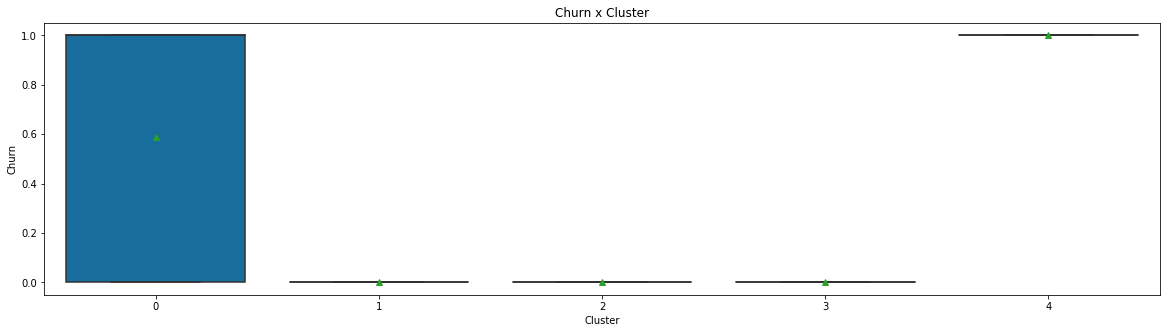

In [241]:
plt.figure(figsize=(20,5))
sns.boxplot(y= 'Churn', x='Cluster',data=data_k_result , palette='colorblind', showmeans=True ).set_title('Churn x Cluster')

We see that soe clusters do not have churn at all. In our case: subs in Cluster 0 churn (58%) and in Cluster 4 almost all or all Prob is 100%)
    


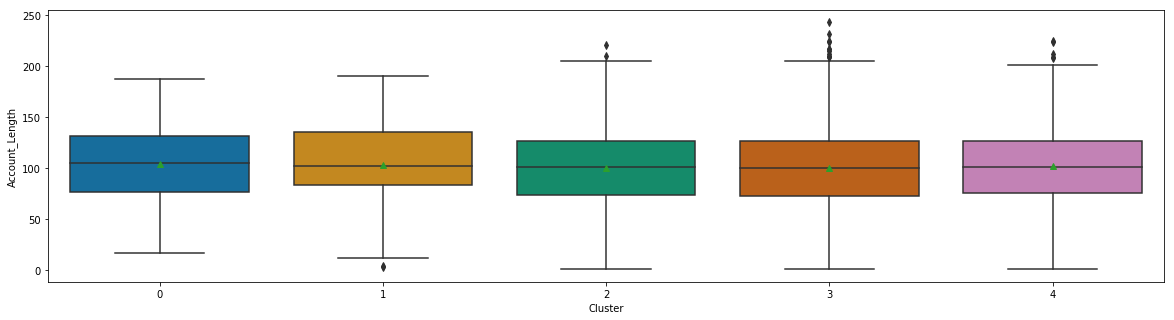

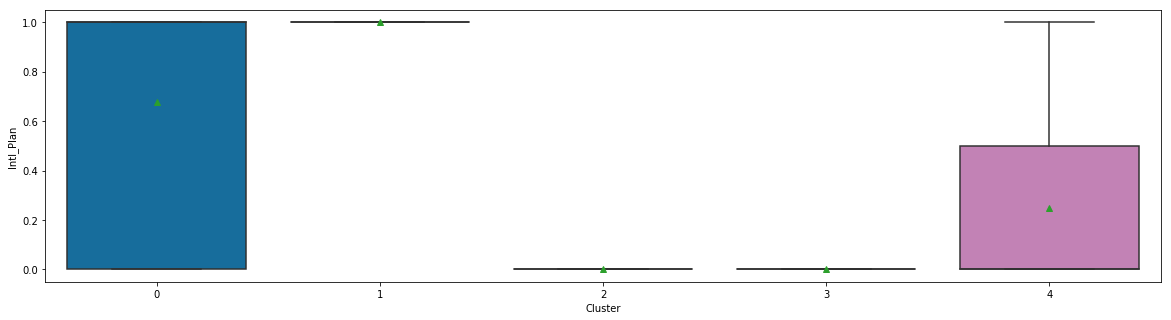

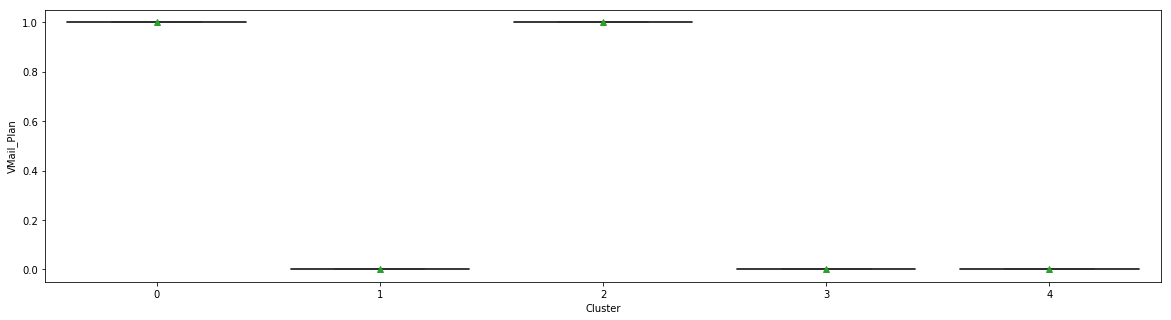

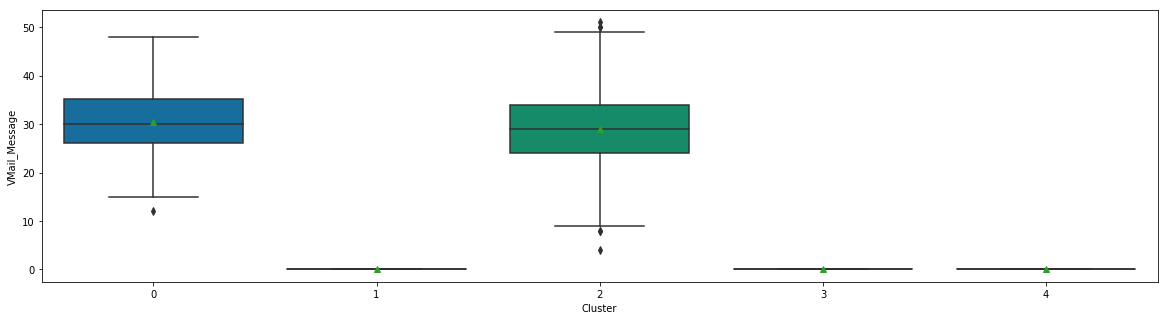

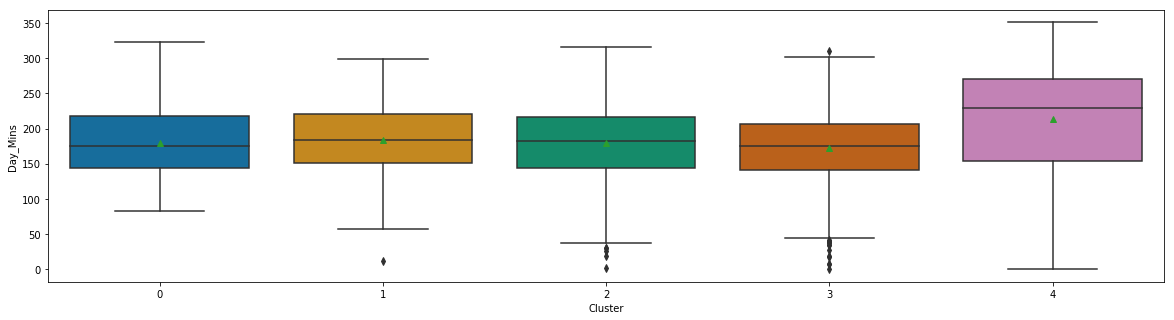

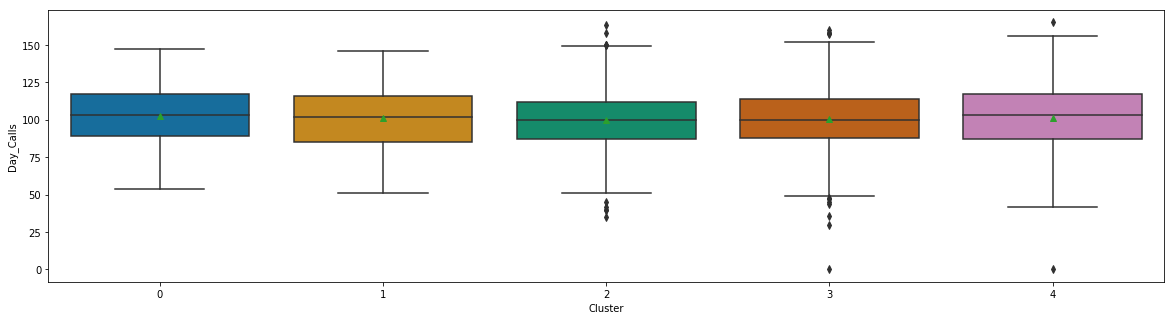

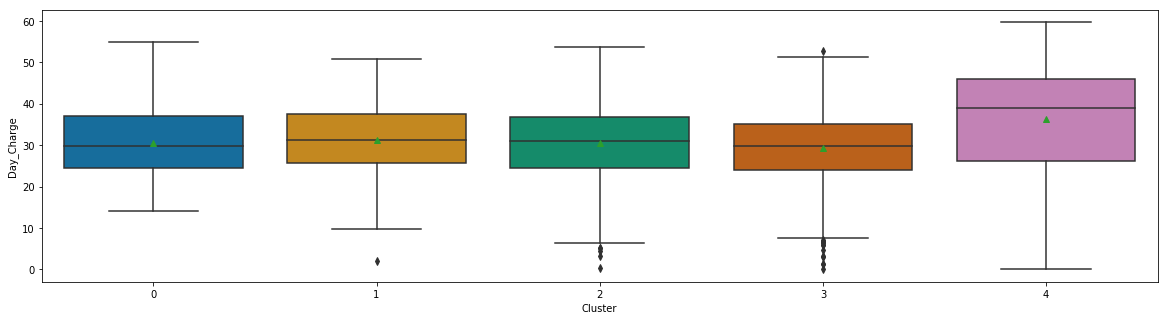

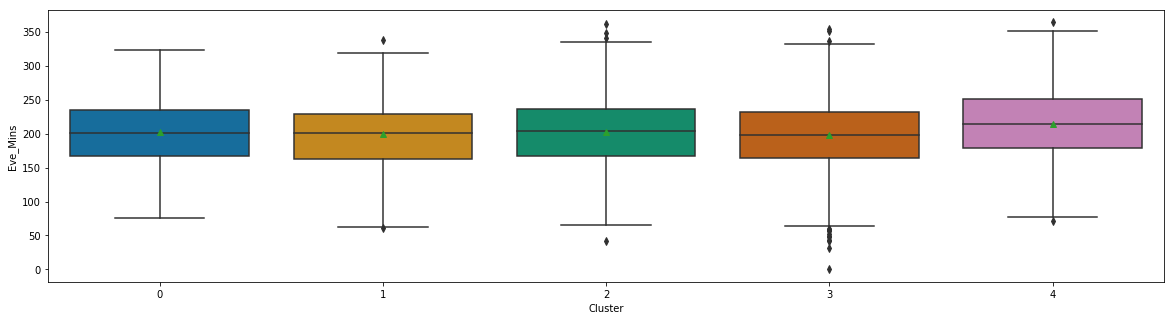

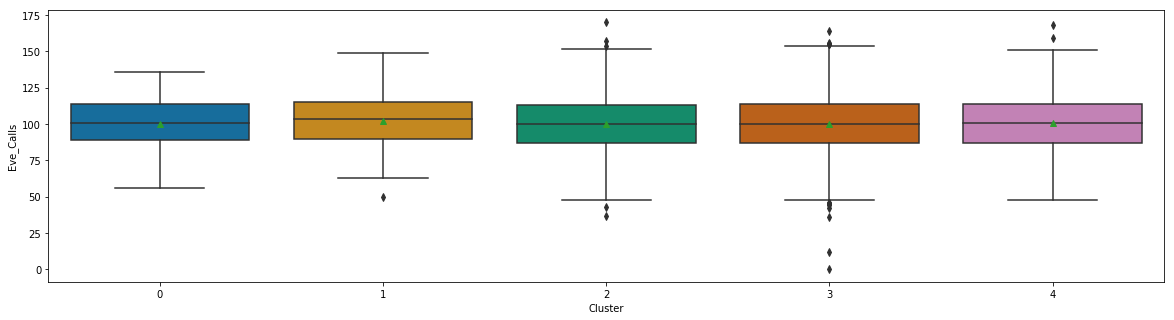

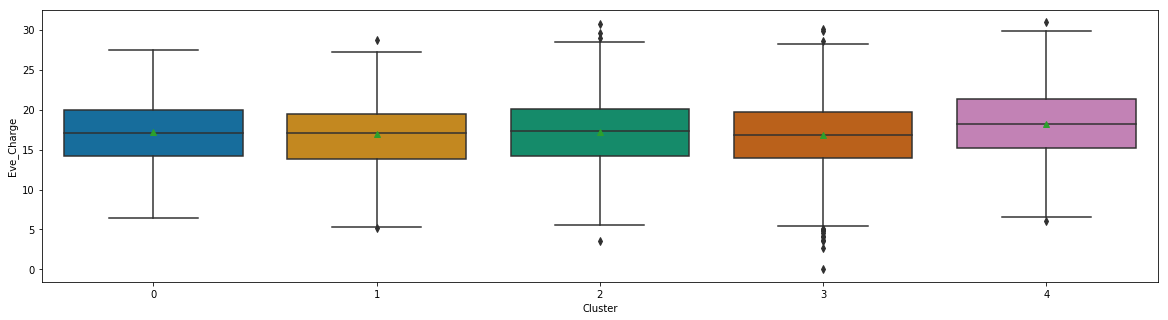

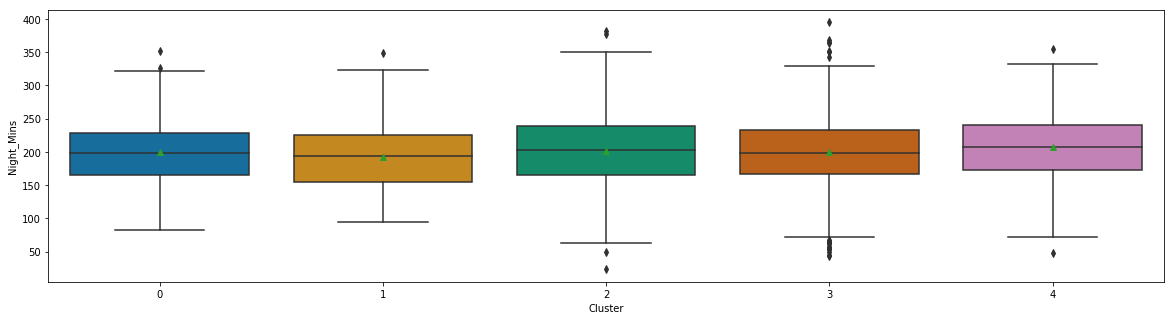

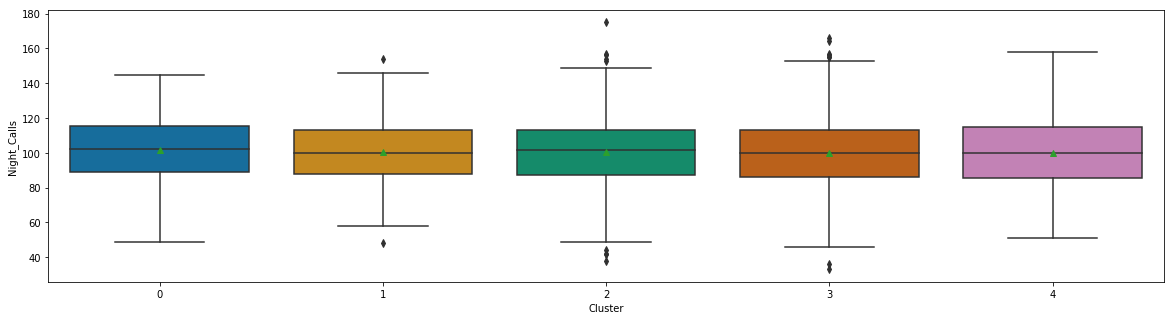

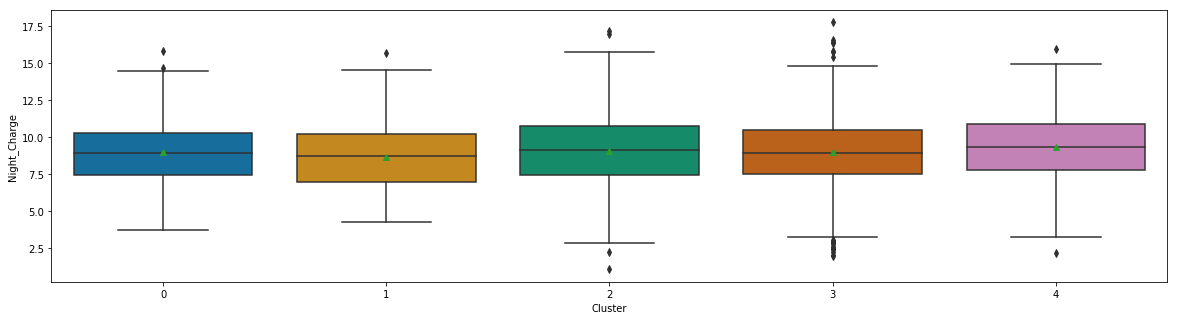

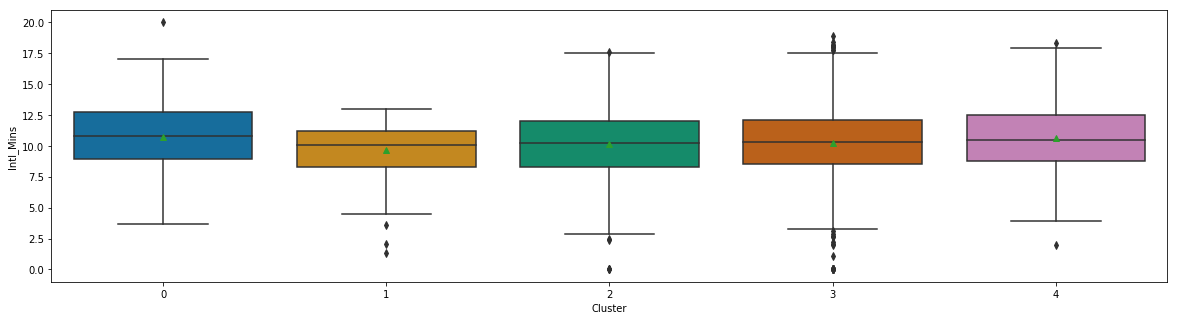

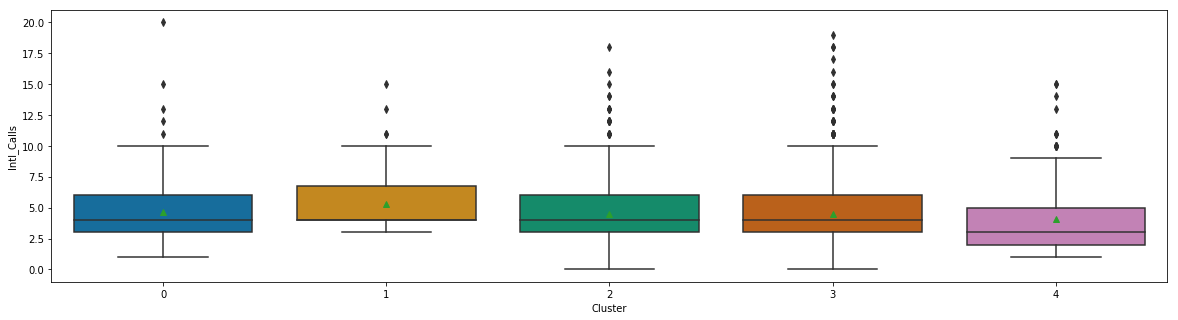

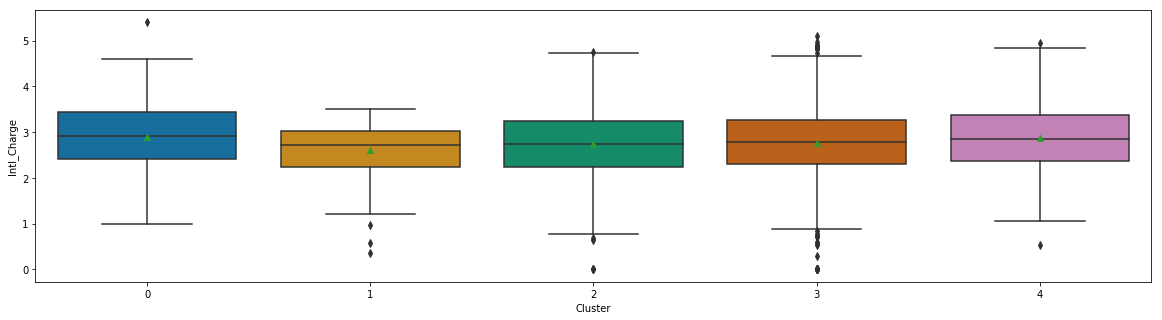

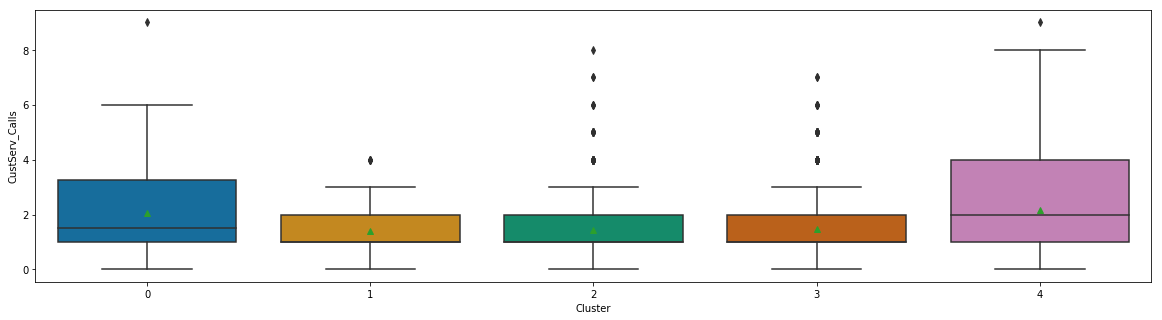

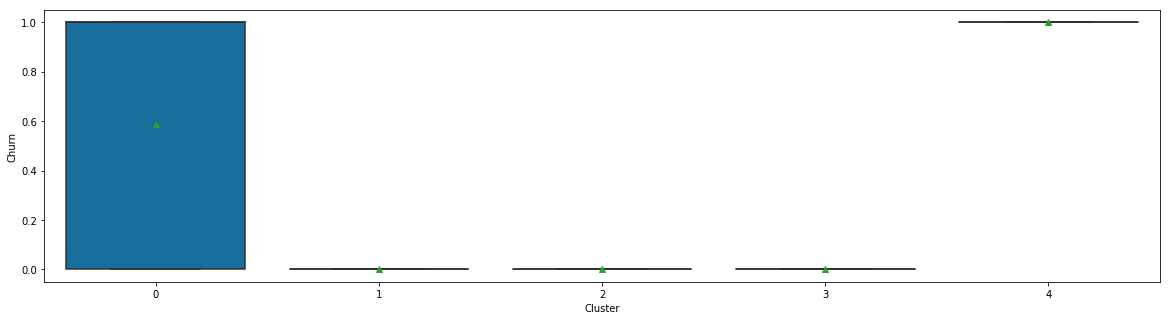

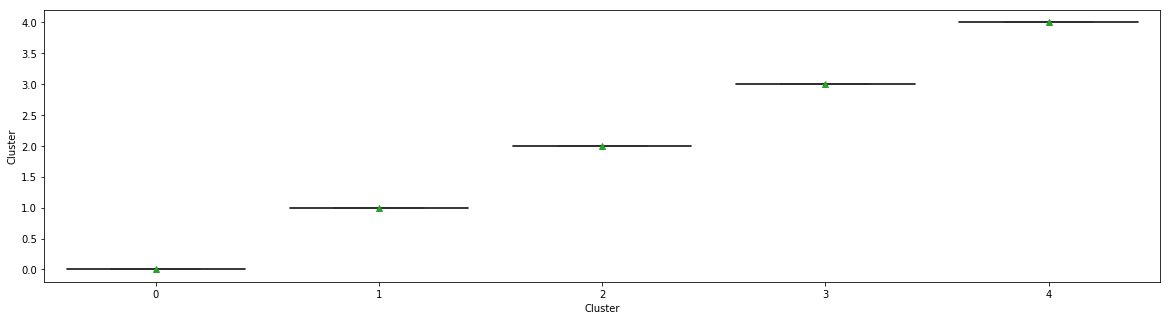

In [247]:
for col in data_k_result.columns: 
    plt.figure(figsize=(20,5))
    sns.boxplot(y= col, x='Cluster',data=data_k_result , palette='colorblind', showmeans=True)

We can see that many variables do not create a trong differentiator. Yet we see that Cluster 0 and 4 (the ones with churn) are the ones with higher Customer Service Calls and either higher day charges or Intl Charges.